In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
data=pd.read_csv('weather_forecast.csv')

In [7]:
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [8]:
data.shape


(8784, 8)

In [9]:
data.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [11]:
data.Weather.value_counts()

Weather
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                

In [12]:
data.Weather.unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

**Categories the Weather Categories into Standard categories:**

In [13]:
x='Thunderstorms,Moderate Rain Showers,Fog'

In [14]:
list_of_lists = [w.split() for w in x.split(',')]
list_of_lists

[['Thunderstorms'], ['Moderate', 'Rain', 'Showers'], ['Fog']]

In [16]:
from itertools import chain
flat_list=list(chain(*list_of_lists))
flat_list

['Thunderstorms', 'Moderate', 'Rain', 'Showers', 'Fog']

In [17]:
def Create_list(x):
    list_of_lists=[w.split() for w in x.split(',')]
    flat_list=list(chain(*list_of_lists))
    return flat_list

def Get_Weather(list1):
    if 'Fog' in list1 and 'Rain' in list1:
        return 'RAIN+FOG'
    elif 'Snow' in list1 and 'Rain' in list1:
         return 'SNOW+RAIN'
    elif 'Snow' in list1:
         return 'SNOW'
    elif 'Fog' in list1: 
         return 'FOG'
    elif 'Clear' in list1: 
         return 'CLEAR'
    elif 'Cloudy' in list1:
         return 'CLOUDY'
    else:
         return 'RAIN'


In [18]:
Create_list(x)

['Thunderstorms', 'Moderate', 'Rain', 'Showers', 'Fog']

In [21]:
Get_Weather(Create_list(x))

'RAIN+FOG'

In [22]:
data['Std_Weather'] = data['Weather'].apply(lambda x:Get_Weather(Create_list(x)))

In [23]:
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,FOG
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,FOG
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",FOG
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",FOG
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog,FOG


In [24]:
data.Std_Weather.value_counts()

Std_Weather
CLOUDY       3797
CLEAR        3432
RAIN          603
SNOW          556
FOG           241
RAIN+FOG      129
SNOW+RAIN      26
Name: count, dtype: int64

**Sample selection and data balancing**

In [25]:
cloudy_df=data[data['Std_Weather']=='CLOUDY'].sample(600)
cloudy_df


,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
2027,3/25/2012 11:00,5.2,3.6,89,6,16.1,100.58,Cloudy,CLOUDY
4871,7/21/2012 23:00,22.9,14.4,59,9,25.0,101.19,Cloudy,CLOUDY
5363,8/11/2012 11:00,23.9,19.8,78,13,24.1,100.61,Mostly Cloudy,CLOUDY
6462,9/26/2012 6:00,15.0,9.1,68,17,24.1,100.86,Cloudy,CLOUDY
5412,8/13/2012 12:00,23.8,17.4,67,17,24.1,100.85,Mostly Cloudy,CLOUDY
...,...,...,...,...,...,...,...,...,...
487,1/21/2012 7:00,-13.9,-22.1,50,9,25.0,102.04,Cloudy,CLOUDY
8108,12/3/2012 20:00,3.5,0.7,82,0,25.0,101.99,Cloudy,CLOUDY
4088,6/19/2012 8:00,20.7,14.8,69,6,24.1,101.12,Cloudy,CLOUDY
7952,11/27/2012 8:00,-5.2,-8.4,78,9,24.1,102.15,Mostly Cloudy,CLOUDY


In [26]:
clear_df=data[data['Std_Weather']=='CLEAR'].sample(600)
clear_df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
698,1/30/2012 2:00,-5.1,-10.0,68,15,25.0,100.99,Clear,CLEAR
5268,8/7/2012 12:00,26.5,16.1,53,17,48.3,100.90,Mainly Clear,CLEAR
7718,11/17/2012 14:00,2.8,-7.4,47,6,48.3,103.43,Mainly Clear,CLEAR
7757,11/19/2012 5:00,-4.0,-7.1,79,9,25.0,103.03,Mainly Clear,CLEAR
4808,7/19/2012 8:00,18.4,9.4,56,6,48.3,101.28,Mainly Clear,CLEAR
...,...,...,...,...,...,...,...,...,...
8174,12/6/2012 14:00,-0.9,-8.7,55,13,48.3,102.21,Mainly Clear,CLEAR
7585,11/12/2012 1:00,0.6,-0.8,90,17,25.0,101.97,Mainly Clear,CLEAR
701,1/30/2012 5:00,-7.9,-13.8,63,13,25.0,101.33,Clear,CLEAR
1580,3/6/2012 20:00,-5.3,-13.6,52,9,25.0,102.72,Mainly Clear,CLEAR


In [27]:
rain_df=data[data['Std_Weather']=='RAIN']
snow_df=data[data['Std_Weather']=='SNOW']


In [28]:
rain_df.shape

(603, 9)

In [29]:
snow_df.shape

(556, 9)

**create new weather dataset**

In [30]:
weather_df=pd.concat([cloudy_df,clear_df,rain_df,snow_df], axis=0)
weather_df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
2027,3/25/2012 11:00,5.2,3.6,89,6,16.1,100.58,Cloudy,CLOUDY
4871,7/21/2012 23:00,22.9,14.4,59,9,25.0,101.19,Cloudy,CLOUDY
5363,8/11/2012 11:00,23.9,19.8,78,13,24.1,100.61,Mostly Cloudy,CLOUDY
6462,9/26/2012 6:00,15.0,9.1,68,17,24.1,100.86,Cloudy,CLOUDY
5412,8/13/2012 12:00,23.8,17.4,67,17,24.1,100.85,Mostly Cloudy,CLOUDY


In [31]:
weather_df.shape

(2359, 9)

In [32]:
weather_df.Std_Weather.value_counts()

Std_Weather
RAIN      603
CLOUDY    600
CLEAR     600
SNOW      556
Name: count, dtype: int64

In [33]:
weather_df.drop(columns=['Date/Time','Weather'],axis=1,inplace=True)

In [34]:
weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
2027,5.2,3.6,89,6,16.1,100.58,CLOUDY
4871,22.9,14.4,59,9,25.0,101.19,CLOUDY
5363,23.9,19.8,78,13,24.1,100.61,CLOUDY
6462,15.0,9.1,68,17,24.1,100.86,CLOUDY
5412,23.8,17.4,67,17,24.1,100.85,CLOUDY


**duplicated records**

In [36]:
weather_df[weather_df.duplicated()]

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather


**null or missing values**

In [37]:
weather_df.isnull().sum()

Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Std_Weather         0
dtype: int64

In [38]:
weather_df.dtypes

Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Std_Weather          object
dtype: object

**Data Visuallization**

In [39]:
weather_df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000
mean,6.806910,1.631284,71.916066,16.778720,23.281772,100.802912
std,11.436226,10.519204,16.096631,9.303125,12.790661,0.905599
min,-23.300000,-28.500000,21.000000,0.000000,0.600000,97.520000
25%,-2.700000,-6.700000,61.000000,9.000000,16.100000,100.310000
50%,5.500000,0.500000,75.000000,15.000000,24.100000,100.840000
75%,16.600000,10.500000,85.000000,22.000000,25.000000,101.380000
max,33.000000,23.100000,99.000000,70.000000,48.300000,103.590000


 **Correlation among the features**

In [40]:
cols = ['Temp_C','Dew Point Temp_C','Rel Hum_%','Wind Speed_km/h',
      'Visibility_km','Press_kPa']

In [41]:
cor_matrix = weather_df[cols].corr()
cor_matrix

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Temp_C,1.000000,0.941416,-0.263147,-0.144831,0.413224,-0.077706
Dew Point Temp_C,0.941416,1.000000,0.071641,-0.142133,0.200251,-0.190137
Rel Hum_%,-0.263147,0.071641,1.000000,0.026296,-0.669288,-0.336434
Wind Speed_km/h,-0.144831,-0.142133,0.026296,1.000000,-0.136526,-0.384069
Visibility_km,0.413224,0.200251,-0.669288,-0.136526,1.000000,0.345305
Press_kPa,-0.077706,-0.190137,-0.336434,-0.384069,0.345305,1.000000


In [121]:
weather_df.columns

Index(['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h',
       'Visibility_km', 'Press_kPa', 'Std_Weather'],
      dtype='object')

<Axes: ylabel='Frequency'>

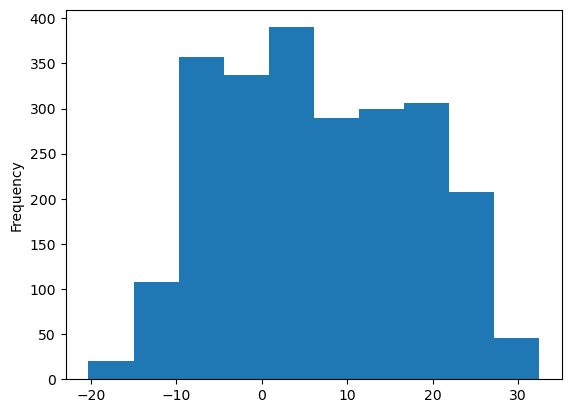

In [122]:
weather_df['Temp_C'].plot(kind='hist')

<Axes: ylabel='Frequency'>

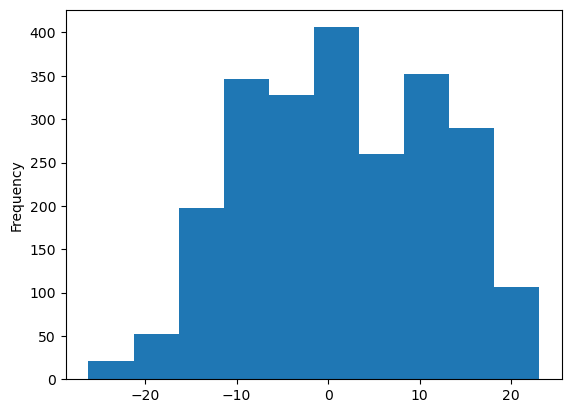

In [123]:
weather_df['Dew Point Temp_C'].plot(kind='hist')

<Axes: ylabel='Frequency'>

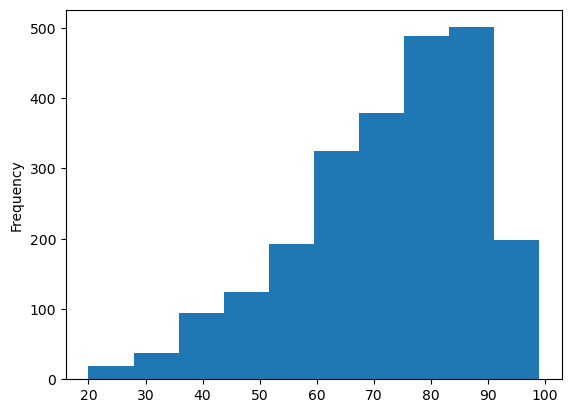

In [124]:
weather_df['Rel Hum_%'].plot(kind='hist')

<Axes: ylabel='Frequency'>

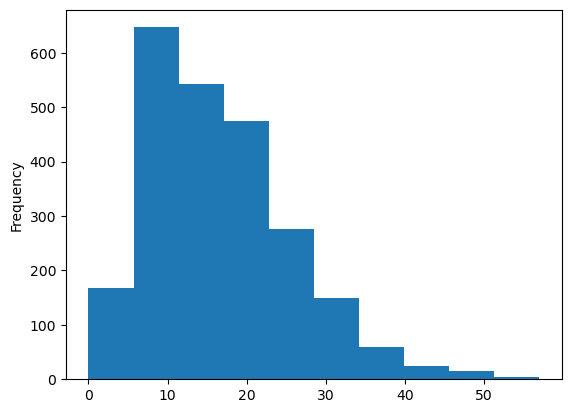

In [125]:
weather_df['Wind Speed_km/h'].plot(kind='hist')

<Axes: ylabel='Frequency'>

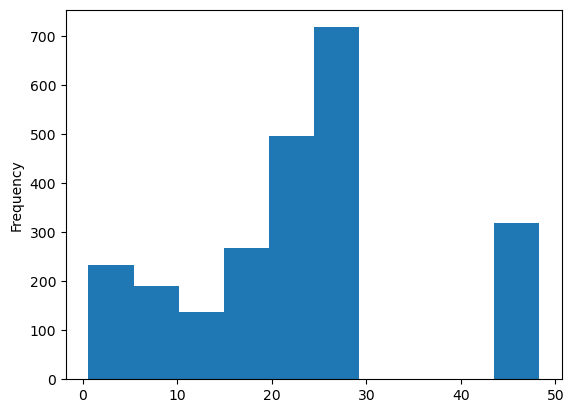

In [126]:
weather_df['Visibility_km'].plot(kind='hist')

<Axes: >

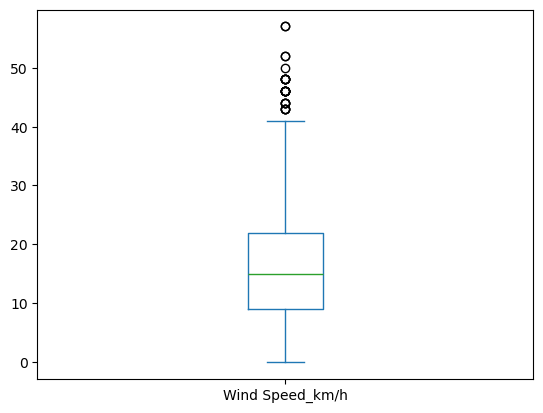

In [127]:
weather_df['Wind Speed_km/h'].plot(kind='box')

<Axes: >

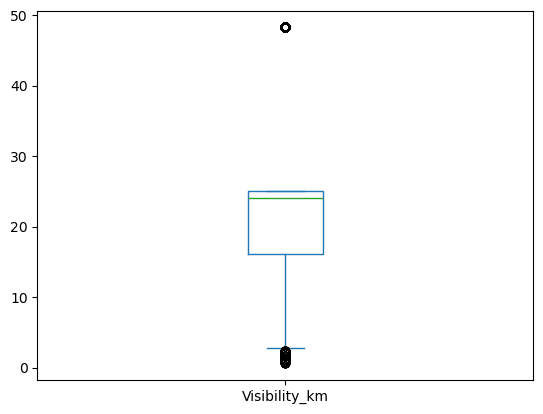

In [128]:
weather_df['Visibility_km'].plot(kind='box')

In [68]:
weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
2027,5.2,3.6,89,6,16.1,100.58,CLOUDY
4871,22.9,14.4,59,9,25.0,101.19,CLOUDY
5363,23.9,19.8,78,13,24.1,100.61,CLOUDY
6462,15.0,9.1,68,17,24.1,100.86,CLOUDY
5412,23.8,17.4,67,17,24.1,100.85,CLOUDY


**Label Encoding**

In [83]:
from sklearn.preprocessing import LabelEncoder

In [85]:
label_Encoder=LabelEncoder()

In [86]:
weather_df['Std_Weather']=label_Encoder.fit_transform(weather_df['Std_Weather'])

In [87]:
label_Encoder.classes_

array(['CLEAR', 'CLOUDY', 'RAIN', 'SNOW'], dtype=object)

In [88]:
weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
2027,5.2,3.6,89,6,16.1,100.58,1
4871,22.9,14.4,59,9,25.0,101.19,1
5363,23.9,19.8,78,13,24.1,100.61,1
6462,15.0,9.1,68,17,24.1,100.86,1
5412,23.8,17.4,67,17,24.1,100.85,1


In [89]:
weather_df.Std_Weather.value_counts()

Std_Weather
2    603
1    600
0    600
3    556
Name: count, dtype: int64

**x,y variables**

In [90]:
X=weather_df.drop(['Std_Weather'],axis=1)
X

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
2027,5.2,3.6,89,6,16.1,100.58
4871,22.9,14.4,59,9,25.0,101.19
5363,23.9,19.8,78,13,24.1,100.61
6462,15.0,9.1,68,17,24.1,100.86
5412,23.8,17.4,67,17,24.1,100.85
...,...,...,...,...,...,...
8779,0.1,-2.7,81,30,9.7,100.13
8780,0.2,-2.4,83,24,9.7,100.03
8781,-0.5,-1.5,93,28,4.8,99.95
8782,-0.2,-1.8,89,28,9.7,99.91


In [91]:
y=weather_df['Std_Weather']
weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
2027,5.2,3.6,89,6,16.1,100.58,1
4871,22.9,14.4,59,9,25.0,101.19,1
5363,23.9,19.8,78,13,24.1,100.61,1
6462,15.0,9.1,68,17,24.1,100.86,1
5412,23.8,17.4,67,17,24.1,100.85,1


**Feature Scaling**

In [92]:
from sklearn.preprocessing import StandardScaler
std_scaler= StandardScaler()

In [93]:
X_std=std_scaler.fit_transform(X)
X_std

array([[-0.14054028,  0.1871941 ,  1.06156104, -1.15885849, -0.56160463,
        -0.24620107],
       [ 1.40750128,  1.21410544, -0.80257818, -0.83631782,  0.13436306,
         0.42752885],
       [ 1.49496126,  1.72756111,  0.37804333, -0.4062636 ,  0.0639843 ,
        -0.21306681],
       ...,
       [-0.63906214, -0.29773625,  1.31011294,  1.20643973, -1.445249  ,
        -0.9420205 ],
       [-0.61282415, -0.32626157,  1.06156104,  1.20643973, -1.06207578,
        -0.98619952],
       [-0.59533216, -0.35478688,  0.87514712,  1.42146684, -0.93695799,
        -1.00828902]])

**splitting data into training and testing**

In [127]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_std,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((1887, 6), (472, 6))

**Model Building**

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

**Creating objects of each mmodel**

In [101]:
LR= LogisticRegression()
DT=DecisionTreeClassifier()
RF=RandomForestClassifier()
ETC=ExtraTreeClassifier()
SVM=SVC()
KNN=KNeighborsClassifier()
GBC=GradientBoostingClassifier()
NB=GaussianNB()
ABC= AdaBoostClassifier()

In [122]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
models=[LR,DT,RF,ETC,SVM,KNN,GBC,ABC,NB]
features=X_std
labels=y
CV=5
accu_list=[]
ModelName = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    ModelName.append(model_name)
    accu_list.append(accuracies.mean()*100) 
    model_acc_df=pd.DataFrame({"Model":ModelName,"Cross_Val_Accuracy":accu_list})
    

In [125]:
model_acc_df


,Model,Cross_Val_Accuracy
0,LogisticRegression,60.536273
1,DecisionTreeClassifier,56.255083
2,RandomForestClassifier,64.224243
3,ExtraTreeClassifier,54.092357
4,SVC,61.258142
5,KNeighborsClassifier,56.637339
6,GradientBoostingClassifier,63.122728
7,AdaBoostClassifier,49.558009
8,GaussianNB,59.773112


**Model Evaluations**

In [115]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



**Classification Report**

In [130]:
RF.fit(x_train,y_train)
y_pred_rf=RF.predict(x_test)

In [131]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.60      0.65      0.62       118
           1       0.49      0.40      0.44       128
           2       0.72      0.76      0.74       126
           3       0.78      0.82      0.80       100

    accuracy                           0.65       472
   macro avg       0.65      0.66      0.65       472
weighted avg       0.64      0.65      0.64       472



**Confusion Matrix**

In [133]:
cm=confusion_matrix(y_test,y_pred_rf)
cm

array([[77, 32,  7,  2],
       [40, 51, 25, 12],
       [ 8, 13, 96,  9],
       [ 4,  9,  5, 82]], dtype=int64)

**Hyperparameter tuning:Model tuning**

In [134]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [142]:
parameters={
'n_estimators':[50,100],
'max_features':['sqrt','log2'],
    "criterion":["gini",'entropy']
}

In [143]:
grid_search = GridSearchCV(estimator=RF,
                           param_grid=parameters)

In [144]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100]})

**Best Hyper parameters**

In [145]:
grid_search.best_params_

{'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 100}

In [146]:
Random_forest_model_new=RandomForestClassifier(criterion='gini',max_features='log2',n_estimators=50)

In [148]:
Random_forest_model_new.fit(x_train,y_train)
y_pred_rf=Random_forest_model_new.predict(x_test)
accuracy_score(y_test,y_pred_rf)

0.6652542372881356

In [149]:
weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
2027,5.2,3.6,89,6,16.1,100.58,1
4871,22.9,14.4,59,9,25.0,101.19,1
5363,23.9,19.8,78,13,24.1,100.61,1
6462,15.0,9.1,68,17,24.1,100.86,1
5412,23.8,17.4,67,17,24.1,100.85,1


In [150]:
Temp=float(input('Enter the Temp_C='))
dpt=float(input('Enter the Dew point Temp_C='))
rh=float(input('Enter the Relative humidity %='))
ws=float(input('Enter the Wind Speed(km/hr)='))
vs=float(input('Enter the Visibility_km='))
pr=float(input('Enter the Pressure Kpa='))

Enter the Temp_C= 23
Enter the Dew point Temp_C= 7.5
Enter the Relative humidity %= 60
Enter the Wind Speed(km/hr)= 25
Enter the Visibility_km= 24
Enter the Pressure Kpa= 100.2


In [151]:
input_data=[Temp,dpt,rh,ws,vs,pr]
scaled_data=std_scaler.transform([input_data])
prediction=Random_forest_model_new.predict(scaled_data)
prediction

array([1])

In [ ]:
if prediction[0]==0:
    print('Weather is "CLEAR"')
elif prediction[0]==1:
     print('Weather is "CLOUDY"')
elif prediction[0]==2:
     print('Weather is "RAINY"')
else:
    print('Weather is "SNOWY"')

**WEATHER PREDICTIVE SYSTEM**

In [157]:
Temp=float(input('Enter the Temp_C='))
dpt=float(input('Enter the Dew point Temp_C='))
rh=float(input('Enter the Relative humidity %='))
ws=float(input('Enter the Wind Speed(km/hr)='))
vs=float(input('Enter the Visibility_km='))
pr=float(input('Enter the Pressure Kpa='))

input_data=[Temp,dpt,rh,ws,vs,pr]
scaled_data=std_scaler.transform([input_data])
prediction=Random_forest_model_new.predict(scaled_data)
print("")
print("*********Weather Prediction Machne Learning Model********")
print("")

if prediction[0]==0:
    print('Weather is "CLEAR"')
elif prediction[0]==1:
     print('Weather is "CLOUDY"')
elif prediction[0]==2:
     print('Weather is "RAINY"')
else:
    print('Weather is "SNOWY"')


Enter the Temp_C= 28
Enter the Dew point Temp_C= 77
Enter the Relative humidity %= 77
Enter the Wind Speed(km/hr)= 0
Enter the Visibility_km= 999
Enter the Pressure Kpa= 999



*********Weather Prediction Machne Learning Model********

Weather is "CLEAR"
